<a href="https://colab.research.google.com/github/Adh101/Machine-Learning-with-Python-DataCamp-/blob/main/Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Forward Propagation:**

    Multiply - Add Process
    Takes Dot Product of inputs and weights
    Takes one node at a time.


In [ ]:
import numpy as np

#setup input values and weights for each node
inputs = np.array([2,3])
weight = {'node_0':np.array([1,1]),
           'node_1':np.array([-1,1]),
           'output_node':np.array([2,-1])}

#calculate the dot products for each node
node_0_value = (inputs * weight['node_0']).sum()
node_1_value = (inputs * weight['node_1']).sum()

#calculate the hidden layer
hidden_layer_value = np.array([node_0_value, node_1_value])
print(hidden_layer_value)

#calculate the output
output = (hidden_layer_value * weight['output_node']).sum()
print(output)


[5 1]
9


##**Activation Functions:**


    Applied in hidden layers to capture the non-linearities of the data.
    Examples: Tanh, ReLU etc

In [ ]:
import numpy as np

#setup input values and weights for each node
inputs = np.array([2,3])
weight = {'node_0':np.array([1,1]),
           'node_1':np.array([-1,1]),
           'output_node':np.array([2,-1])}

#calculate the dot products for each node using activation function
node_0_value = (inputs * weight['node_0']).sum()
node_0_activation_value = np.tanh(node_0_value)

node_1_value = (inputs * weight['node_1']).sum()
node_1_activation_value = np.tanh(node_1_value)

#calculate the hidden layer
hidden_layer_activation_value = np.array([node_0_activation_value, node_1_activation_value])
print(hidden_layer_activation_value)

#calculate the output
output = (hidden_layer_value * weight['output_node']).sum()
output_activation_value = np.tanh(output)
print(output_activation_value)

[0.9999092  0.76159416]
0.9999999695400409


####ReLU(Rectified Linear Activation Function):

    It takes one single value as input and return 'input' if value is positive, otherwise returns 0 if value is negative.

In [ ]:
def relu(input):
  output = max(input,0)
  return output

import numpy as np

#setup input values and weights for each node
inputs = np.array([2,3])
weight = {'node_0':np.array([1,1]),
           'node_1':np.array([-1,1]),
           'output_node':np.array([2,-1])}

#calculate the dot products for each node using activation function
node_0_value = (inputs * weight['node_0']).sum()
node_0_output = relu(node_0_value)

node_1_value = (inputs * weight['node_1']).sum()
node_1_output = relu(node_1_value)

#calculate the hidden layer
hidden_layer_value = np.array([node_0_output, node_1_output])
print(hidden_layer_value)

#calculate the output
output = (hidden_layer_value * weight['output_node']).sum()  #donot use relu here
relu_output = relu(output)
print(output)
print(relu_output)


[5 1]
9
9


#### **Predicting with multiple rows of data:**

In [ ]:
input_data = np.array([[2,3],[3,4],[4,5],[10,5],[1,5]])
weights = {'node_0':np.array([1,1]),
           'node_1':np.array([-1,1]),
           'output_node':np.array([2,-1])}

#Define activation function
def relu(input):
  output = max(input,0)
  return output

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])

    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output_node']).sum()
    model_output = relu(input_to_final_layer)

    # Return model output
    return(model_output)

#Iterate over the rows of data
results = []

for input_data_row in input_data:
  predictions = predict_with_network(input_data_row, weights)
  results.append(predictions)

print(results)

[9, 13, 17, 30, 8]


#### **Deep Networks / Multi Layer Neural Networks:**

In [ ]:
input_data = np.array([[2,3],[3,4],[4,5],[10,5],[1,5]])
weights = {'node_0_0':np.array([1,1]),
           'node_0_1':np.array([-1,1]),
           'node_1_0':np.array([2,-1]),
           'node_1_1':np.array([0,1]),
           'output_node':np.array([2,-1])}

def predict_with_multinetwork(input_data):

  #first layer and first node
  node_0_0_input = (input_data * weights['node_0_0']).sum()
  node_0_0_output = relu(node_0_0_input)

  #first layer and second node
  node_0_1_input = (input_data * weights['node_0_1']).sum()
  node_0_1_output = relu(node_0_1_input)

  #first layer output
  hidden_layer_0_output = np.array([node_0_0_output, node_0_1_output])

  #second layer first node
  node_1_0_input = (hidden_layer_0_output * weights['node_1_0']).sum()
  node_1_0_output = relu(node_1_0_input)

  #second layer second node
  node_1_1_input = (hidden_layer_0_output * weights['node_1_1']).sum()
  node_1_1_output = relu(node_1_1_input)

  #second layer output
  hidden_layer_1_output = np.array([node_1_0_output, node_1_1_output])

  #model output
  model_input = (hidden_layer_1_output * weights['output_node']).sum()
  model_output = relu(model_input)

  return model_output

results = []

for input_data_row in input_data:
  predictions = predict_with_multinetwork(input_data_row)
  results.append(predictions)

print(results)

[17, 25, 33, 60, 12]


#### **Optimizing the model by changing weights:**

In [ ]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output_node': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output_node': [-1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data,weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [ ]:
#Scaling the error in mutliple points using Mean Square Error

from sklearn.metrics import mean_squared_error
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output_node': [1, 1]}

weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output_node': [-1, 1]
            }

model_output_0 = []
model_output_1 = []
target_actuals = np.array([6,3])

for row in input_data:
  model_output_0.append(predict_with_network(input_data, weights_0))
  model_output_1.append(predict_with_network(input_data, weights_1))

mse_0 = mean_squared_error(target_actuals, model_output_0)
mse_1 = mean_squared_error(target_actuals, model_output_1)

print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 22.500000
Mean squared error with weights_1: 4.500000


#### **Gradient Descent:**

      Algorithm to achieve the minimum loss funtion by adjusting the weights of the node.
      Updates each weight by subtracting ** learning rate * slope of weight **

      Slope of the weights = slope of the loss function(error) * input node value * slope of the activation function

In [ ]:
import numpy as np

input_data = np.array([3,4])
weights = np.array([1,2])
target = 6
learning_rate = 0.01

#calculate the predictions
predictions = (input_data * weights).sum()
print("Predictions:",predictions)
#calculate the error
error = predictions - target
print("Error:",error)

#calculate the gradient i.e. slope of the weight
gradient = 2 * error * input_data #not taking activation function
print("Gradient or Slope:",gradient)

#update the weights
weights_updated = weights - (learning_rate * gradient)
print("Updated weights:",weights_updated)

#updated predictions
predictions_updated = (input_data * weights_updated).sum()
print("Updated Predictions:",predictions_updated)

#updated error
error_updated = predictions_updated - target
print("Updated Error:",error_updated)

Predictions: 11
Error: 5
Gradient or Slope: [30 40]
Updated weights: [0.7 1.6]
Updated Predictions: 8.5
Updated Error: 2.5


#### **Creating a Keras Model**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/wage per hour dataset - Sheet1.csv')
df.head()

predictors = np.array(df.drop('wage_per_hour', axis = 1).values) #array of predictors
target = df['wage_per_hour'].values #target value

In [ ]:
!pip install keras

In [ ]:
# Specifying Model Architecture
from keras.layers import Dense  #Importing Dense i.e. all nodes are connected to previous layer nodes
from keras.models import Sequential

n_cols = predictors.shape[1] #number of columns in predictors

model = Sequential()  #Model Architecture
model.add(Dense(50, activation = 'relu', input_shape =(n_cols,))) #First Layer
model.add(Dense(32, activation = 'relu', input_shape = (n_cols,))) #Second Layer
model.add(Dense(1)) #Output Layer

#Compile and Fit Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(predictors,target)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49.5721


#### **Classification Models in Deep Learning**

    - Modify the loss function i.e. most common loss function is 'categorical_crossentropy'
    - Modify output layer to 2 and use activation funtion to 'softmax'.
    - Add metrics = ['accuracy'] while compiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv('/content/titanic survival data - Sheet1.csv')
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.utils import to_categorical #to change the target value to categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model #to load the saved model

#dataset (predictors, target(categorical), and n_cols)
titanic_predictors = titanic.drop('survived', axis = 1).values
titanic_predictors = titanic_predictors.astype(np.float32) #used to convert value to float because of error
titanic_target = to_categorical(titanic['survived'])

n_cols = titanic_predictors.shape[1]

#specify the model
model = Sequential()
model.add(Dense(32, activation= 'relu', input_shape = (n_cols,)))
model.add(Dense(2, activation = 'softmax')) #modify the last layer for classification

#compile and fit
model.compile(optimizer = 'sgd', loss ='categorical_crossentropy', metrics=['accuracy'])
model.fit(titanic_predictors,titanic_target)

#saving the model
model.save('titanic_model.h5')

#reloading and using the model
my_model = load_model('titanic_model.h5')
predictions = my_model.predict(titanic_predictors[0:10])
print(predictions)

#probabilities of survival on titanic data
probabilities = predictions[:,1]
print(probabilities)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5838 - loss: 3.4556    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.612003   0.38799697]
 [0.00276694 0.99723315]
 [0.7378086  0.26219136]
 [0.01497534 0.9850246 ]
 [0.82876897 0.17123097]
 [0.8141171  0.18588291]
 [0.10787242 0.8921276 ]
 [0.13878204 0.86121786]
 [0.61629355 0.3837065 ]
 [0.07776719 0.92223275]]
[0.38799697 0.99723315 0.26219136 0.9850246  0.17123097 0.18588291
 0.8921276  0.86121786 0.3837065  0.92223275]


#### **Model Optimization:**

In [ ]:
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent

lr_to_test = [0.00001, 0.01,1.0]

for lr in lr_to_test:
  model = load_model('titanic_model.h5')
  my_optimizer = SGD(lr)
  model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
  model.fit(titanic_predictors, titanic_target)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1902


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1189


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 688.6805


#### **Model Validation:**

In [ ]:
model = load_model('titanic_model.h5')
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'])
model.fit(titanic_predictors, titanic_target, validation_split = 0.3)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6523 - loss: 1.0279 - val_accuracy: 0.6828 - val_loss: 0.6038


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping #to stop the model training of validation score is not improving

early_stopping_monitor = EarlyStopping(patience = 3)

model = load_model('titanic_model.h5')
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'])
model.fit(titanic_predictors, titanic_target, validation_split = 0.3, epochs = 30,
          callbacks =[early_stopping_monitor])

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6761 - loss: 1.0254 - val_accuracy: 0.6940 - val_loss: 0.6045
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.6781 - val_accuracy: 0.6604 - val_loss: 0.6348
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6468 - loss: 0.6540 - val_accuracy: 0.6791 - val_loss: 0.5936
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6417 - loss: 0.6456 - val_accuracy: 0.6716 - val_loss: 0.6017
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6403 - loss: 0.6569 - val_accuracy: 0.6903 - val_loss: 0.5840
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6856 - loss: 0.6200 - val_accuracy: 0.6828 - val_loss: 0.5813
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6585 - loss: 0.6225 - val_accuracy: 0.6940 - val_loss: 0.5725
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6801 - loss: 0.6135 - val_accuracy: 0.6978 - val_lo

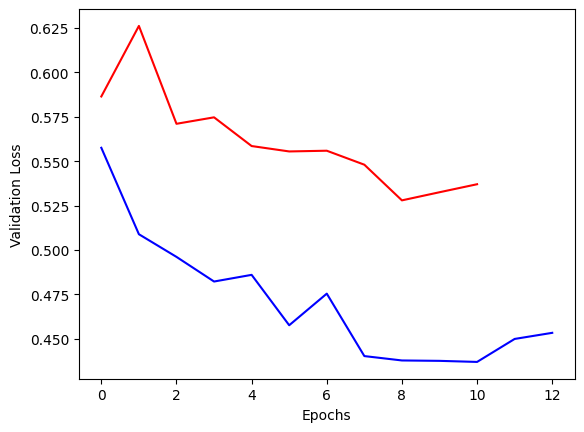

In [ ]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

model_1 = load_model('titanic_model.h5')
model_1.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model_2.add(Dense(100, activation='relu', input_shape = (n_cols,)))

# Add the output layer
model_2.add(Dense(2, activation ='softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

# Fit model_1
model_1_training = model_1.fit(titanic_predictors, titanic_target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(titanic_predictors, titanic_target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()